In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def kmeans(img, K=4, it=10):
    if img.ndim == 2:
        h, w = img.shape
        pixels = img.reshape(-1, 1).astype(np.float32)
    else:
        h,w,c = img.shape
        pixels = img.reshape(-1, 3).astype(np.float32)

    np.random.seed(40)
    centroids = pixels[np.random.choice(pixels.shape[0], K, replace=False)]

    for _ in range(it):
        distances = np.linalg.norm(pixels[:, None] - centroids[None, :], axis=2)
        labels = np.argmin(distances, axis=1)
        for k in range(K):
            if np.any(labels == k):
                centroids[k] = pixels[labels == k].mean(axis=0)

    segmented_pixels = centroids[labels].reshape((h, w, -1))
    if segmented_pixels.shape[2] == 1:
        segmented_pixels = segmented_pixels.squeeze(-1)

    return segmented_pixels.astype(np.uint8)

In [ ]:
classes=['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
def extractingimages(x, y, count=1):
    images = []
    for i in range(10):
        index = np.where(y==i)[0][:count]
        images.append((x[index],classes[i]))
    return images

In [ ]:
(x_train,y_train),(q,w)= cifar10.load_data()
images = extractingimages(x_train, y_train)

In [ ]:
import matplotlib.pyplot as plt

def plotting(images, K=4):
    n = len(images)
    fig, axes = plt.subplots(2, n, figsize=(3* n,6))

    for i, (img, label) in enumerate(images):
        # segmented = kmeans(img, K)

        axes[0, i].imshow(img)
        axes[0, i].set_title(f"{label}Original",fontsize=10)
        axes[0, i].axis('off')
        # axes[1, i].imshow(segmented)
        # axes[1, i].set_title(f"{label}Segmented", fontsize=10)
        # axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
print(images)

[(array([[[[202, 204, 199],
         [202, 204, 199],
         [204, 206, 201],
         ...,
         [207, 208, 200],
         [205, 206, 199],
         [203, 204, 198]],

        [[206, 208, 203],
         [206, 208, 203],
         [207, 209, 204],
         ...,
         [210, 211, 205],
         [208, 209, 203],
         [206, 207, 201]],

        [[210, 212, 207],
         [211, 213, 208],
         [212, 214, 210],
         ...,
         [214, 214, 210],
         [212, 213, 208],
         [210, 211, 206]],

        ...,

        [[218, 217, 222],
         [210, 209, 214],
         [194, 194, 198],
         ...,
         [243, 242, 247],
         [244, 242, 247],
         [243, 243, 247]],

        [[219, 218, 223],
         [217, 216, 221],
         [216, 216, 220],
         ...,
         [241, 240, 245],
         [241, 240, 245],
         [241, 240, 245]],

        [[217, 216, 221],
         [216, 215, 220],
         [217, 216, 221],
         ...,
         [239, 238, 243],
      

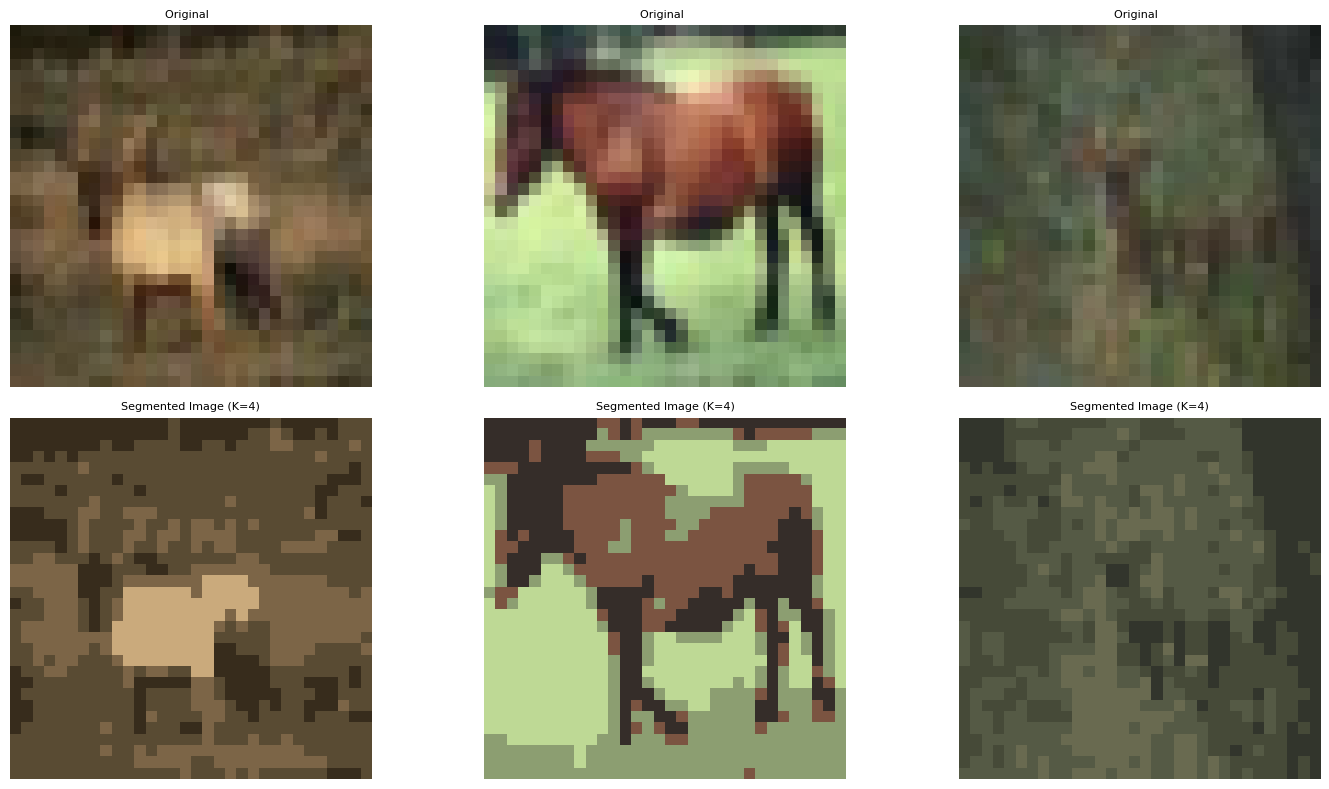

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import pairwise_distances_argmin_min

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

target_classes = [7, 4, 0]
x_train_filtered = x_train[np.isin(y_train, target_classes).flatten()]
y_train_filtered = y_train[np.isin(y_train, target_classes).flatten()]

def kmeans_segmentation(img, K=4):
    height, width, channel = img.shape
    pixels = img.reshape(-1,channel)
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.predict(pixels)
    segmented_img = kmeans.cluster_centers_[labels].reshape(height, width, channel)
    segmented_img = np.uint8(segmented_img)

    return segmented_img

def plot_segmented_images(images, K=4):
    plt.figure(figsize=(15, 8))
    for i, img in enumerate(images):
        segmented_img = kmeans_segmentation(img, K)
        plt.subplot(2, len(images), i + 1)
        plt.imshow(img)
        plt.title(f"Original  ", fontsize=8)
        plt.axis('off')

        plt.subplot(2, len(images), i + 1 + len(images))
        plt.imshow(segmented_img)
        plt.title(f"Segmented Image (K={K})", fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

images_to_display = x_train_filtered[:3]
plot_segmented_images(images_to_display, K=4)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import cifar10

#same for both files
(x_train, y_train), (_, _) = cifar10.load_data()

target_classes = [7, 4, 0]
x_train_filtered = x_train[np.isin(y_train, target_classes).flatten()]
y_train_filtered = y_train[np.isin(y_train, target_classes).flatten()]



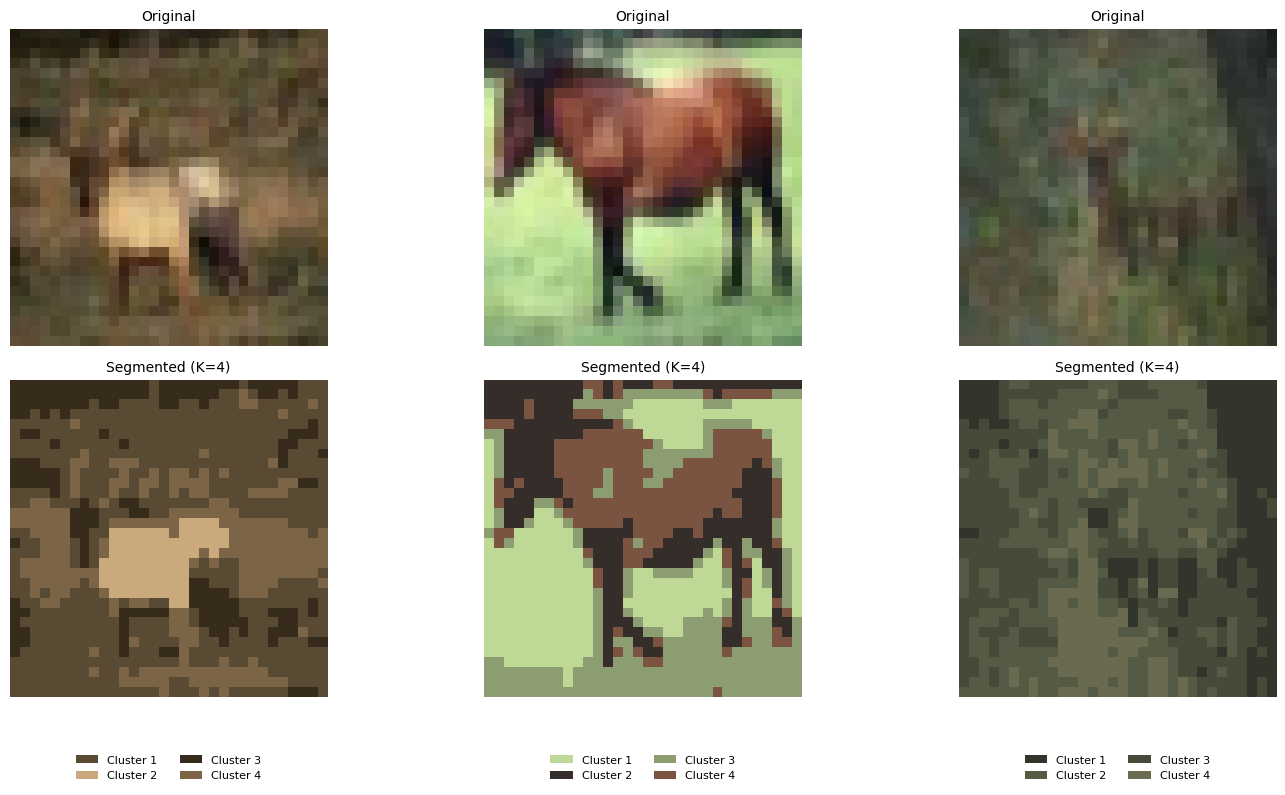

In [ ]:
def kmeans_segmentation(img, K=4):
    height, width, channel = img.shape
    pixels = img.reshape(-1, channel)
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(pixels)
    labels = kmeans.predict(pixels)
    segmented_img = kmeans.cluster_centers_[labels].reshape(height, width, channel)
    segmented_img = np.uint8(segmented_img)
    return segmented_img, kmeans.cluster_centers_

def plot_segmented_images(images, K=4):
    num_images = len(images)
    fig, axes = plt.subplots(2, num_images, figsize=(5 * num_images, 8))

    for i, img in enumerate(images):
        segmented_img, centers = kmeans_segmentation(img, K)
        centers = np.uint8(centers)
        axes[0, i].imshow(img)
        axes[0, i].set_title("Original", fontsize=10)
        axes[0, i].axis('off')
        axes[1, i].imshow(segmented_img)
        axes[1, i].set_title(f"Segmented (K={K})", fontsize=10)
        axes[1, i].axis('off')
        legend_elements = [Patch(facecolor=np.array(c) / 255.0, label=f'Cluster {j+1}')
                           for j, c in enumerate(centers)]
        axes[1, i].legend(handles=legend_elements,
                          loc='upper center',
                          bbox_to_anchor=(0.5, -0.15),
                          ncol=2,
                          fontsize=8,
                          frameon=False)

    plt.tight_layout()
    plt.show()

images_to_display = x_train_filtered[:3]
plot_segmented_images(images_to_display, K=4)


In [ ]:
def plot_segmented_images(images, K=4):
    plt.figure(figsize=(15, 8))
    for i, img in enumerate(images):
        segmented_img = kmeans_segmentation(img, K)
        plt.subplot(2, len(images), i + 1)
        plt.imshow(img, interpolation='none')
        plt.title(f"Original Image", fontsize=8)
        plt.axis('off')

        # Plot image
        plt.subplot(2, len(images), i + 1 + len(images))
        plt.imshow(segmented_img, interpolation='none')
        plt.title(f"Segmented Image (K={K})", fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


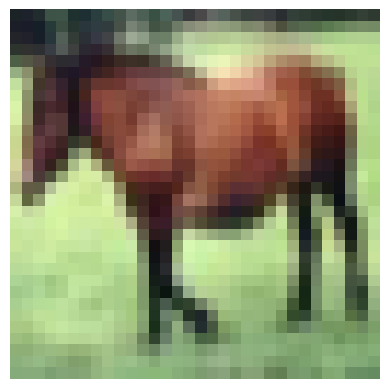

In [ ]:
import matplotlib.pyplot as plt
import torchvision.datasets as datasets

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
cifar10 = datasets.CIFAR10(root='./data', train=True, download=True)
for img, label in cifar10:
    if label == 7:
        break
plt.imshow(img)
plt.axis('off')
plt.show()

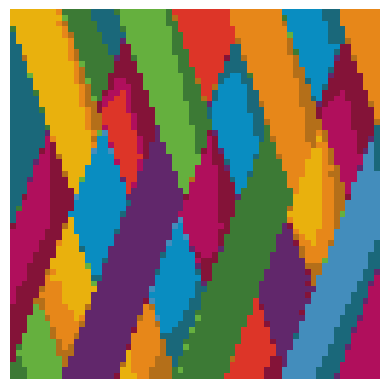

In [ ]:
import cv2
img=cv2.imread('/content/test1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(64,64))
seg,cl=kmeans_segmentation(img, K=12)
plt.imshow(seg)
plt.axis('off')
plt.show()
